# This Program uses Convolution Neural Network(CNN) to classify hand written digits as numbers 0 - 9

In [2]:
# Import the Packages / Dependencies
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Flatten
from keras.layers.pooling import *
from keras.utils import to_categorical
from keras.datasets import mnist # Get data set from
from matplotlib import pyplot as plt # Graph
import numpy as np

In [3]:
# load dataset
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# summarize loaded dataset
print('Training_images: =%s,  labels=%s' % (training_images.shape, training_labels.shape))
print('Test_images:    =%s, labels=%s'  % (test_images.shape, test_labels.shape))


Training_images: =(60000, 28, 28),  labels=(60000,)
Test_images:    =(10000, 28, 28), labels=(10000,)


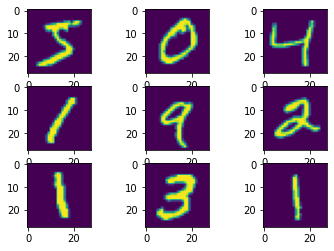

In [5]:
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(training_images[i])
# show the figure
plt.show()

In [6]:
# Pixel in Image
print(training_images.shape)
print(training_images[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [7]:
# Print the image label
training_labels[0]

5

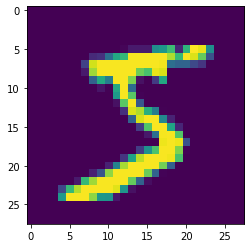

In [8]:
# Show the image as a picture
plt.imshow(training_images[0])

In [9]:
# Reshape the data to fit the model
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [10]:
# One -Hot Encoding:
training_labels_one_hot = to_categorical(training_labels)
test_images_one_hot = to_categorical(test_labels)

#print the new labels
print(training_labels_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [21]:
model = Sequential([
    Conv2D(16, kernel_size=(3, 3) ,activation='relu', input_shape=(28,28,1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Conv2D(64, kernel_size=(5, 5), activation='relu', padding='same'),
    Flatten(),
    Dense(10, activation='softmax'),
])

In [32]:
# Compile the Keras model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Train the Model
history = model.fit(training_images, training_labels_one_hot, validation_data=(test_images, test_images_one_hot), epochs=3, batch_size=512 )

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 593s 10ms/step - loss: 1.2726 - accuracy: 0.8816 - val_loss: 0.0825 - val_accuracy: 0.9743
Epoch 2/3
60000/60000 [==============================] - 667s 11ms/step - loss: 0.0660 - accuracy: 0.9797 - val_loss: 0.0587 - val_accuracy: 0.9806
Epoch 3/3
60000/60000 [==============================] - 590s 10ms/step - loss: 0.0444 - accuracy: 0.9862 - val_loss: 0.0481 - val_accuracy: 0.9834


In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        51264     
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                108170    
Total params: 164,234
Trainable params: 164,234
Non-trainable params: 0
________________________________________________

In [33]:
# Evaluaction the Model on Testing data set
print(model.evaluate(test_images,test_images_one_hot))


10000/10000 [==============================] - 31s 3ms/step
[0.048120945581118575, 0.9833999872207642]


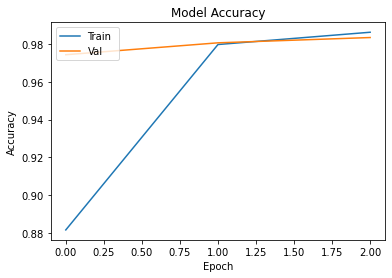

In [27]:
# Visualize the models accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train ', 'Val'], loc='upper left')
plt.show()


### Check Model Accuracy

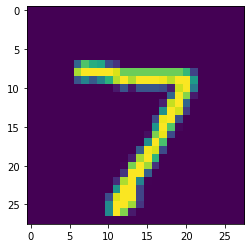

In [34]:
# Original Value
plt.imshow(test_images[0])

In [35]:
# Our Model prediction
prediction = model.predict(test_images)
print(np.argmax(prediction[0]))

7
